## Beispiel Neuronales Netz

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #laden Mnist-Datensammlung

In [3]:
print('Dimensionen Trainingsdaten: ', train_images.shape) #Bilder als numpy-Arrays
print('Anzahl Trainingsdaten: ',len(train_labels))
print('Lables Trainingsdaten: ', train_labels) #Klassenbezeichnungen, als Ziffernarray

Dimensionen Trainingsdaten:  (60000, 28, 28)
Anzahl Trainingsdaten:  60000
Lables Trainingsdaten:  [5 0 4 ... 5 6 8]


In [4]:
print('Anzahl Achsen des Tensors: ', train_images.ndim)

Anzahl Achsen des Tensors:  3


In [5]:
print('Datentyp:',train_images.dtype)

Datentyp: uint8


Anzeigen eines Bildes der Trainigsdatenmenge

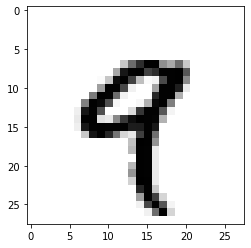

In [6]:
digit=train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [7]:
print('Dimensionen Testsdaten: ', test_images.shape) #Bilder als numpy-Arrays
print('Anzahl Testdaten: ',len(test_labels))
print('Lables Testdaten: ', test_labels) #Klassenbezeichnungen, als Ziffernarray

Dimensionen Testsdaten:  (10000, 28, 28)
Anzahl Testdaten:  10000
Lables Testdaten:  [7 2 1 ... 4 5 6]


In [8]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu',
                        input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax')) #Layer gibt 10 Wahrscheinlichkeiten aus, deren Summe 1

Vorverarbeitung Daten

In [9]:
train_images=train_images.reshape((60000,28*28)) # Umwandeln in 2D_Array 
train_images=train_images.astype('float32') / 255  # Umwandeln in float von uint8, auf Werte von 00..1 aus 0..255

In [10]:
test_images=test_images.reshape((10000,28*28)) # Umwandeln in 2D_Array 
test_images=test_images.astype('float32') / 255  # Umwandeln in float von uint8, auf Werte von 00..1 aus 0..255

Kategorisierung Klassenbezeichnungen

In [11]:
from keras.utils.np_utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

Validierung mit Extra abgesplatener Validierungsmenge

In [12]:
images_val = train_images[:10000] #10000 Datensätze zurückhalten als Validierungdmenge
partial_images_val = train_images[50000:]
labels_val = train_labels[:10000] 
partial_labels_val = train_labels[50000:]

Vorbereitung Netz

In [13]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Trainieren

In [14]:
#networkhistory=network.fit(train_images, train_labels, epochs=5, batch_size=128) #ohne Extravalidierung
network_history=network.fit(partial_images_val,
                           partial_labels_val, 
                           epochs=20, 
                           batch_size=128,
                           validation_data=(images_val,labels_val))

Epoch 1/20
79/79 [==============================] - 1s 6ms/step - loss: 0.4989 - accuracy: 0.8602 - val_loss: 0.5148 - val_accuracy: 0.8241
Epoch 2/20
79/79 [==============================] - 1s 6ms/step - loss: 0.2318 - accuracy: 0.9337 - val_loss: 0.2810 - val_accuracy: 0.9194
Epoch 3/20
79/79 [==============================] - 0s 5ms/step - loss: 0.1623 - accuracy: 0.9552 - val_loss: 0.2257 - val_accuracy: 0.9312
Epoch 4/20
79/79 [==============================] - 1s 7ms/step - loss: 0.1220 - accuracy: 0.9662 - val_loss: 0.1965 - val_accuracy: 0.9414
Epoch 5/20
79/79 [==============================] - 0s 5ms/step - loss: 0.0932 - accuracy: 0.9740 - val_loss: 0.2353 - val_accuracy: 0.9283
Epoch 6/20
79/79 [==============================] - 0s 5ms/step - loss: 0.0695 - accuracy: 0.9820 - val_loss: 0.1922 - val_accuracy: 0.9429
Epoch 7/20
79/79 [==============================] - 0s 5ms/step - loss: 0.0543 - accuracy: 0.9855 - val_loss: 0.1830 - val_accuracy: 0.9472
Epoch 8/20
79/79 [==

Testen

In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Korrektklasssifiziereungsrate Test:',test_acc)

313/313 [==============================] - 0s 675us/step - loss: 0.1954 - accuracy: 0.9610
Korrektklasssifiziereungsrate Test: 0.9610000252723694


In [16]:
history_dict=network_history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Einträge in history: überwachte Kennzahlen während training und Validierung

#### Plotten Verlustfunktion

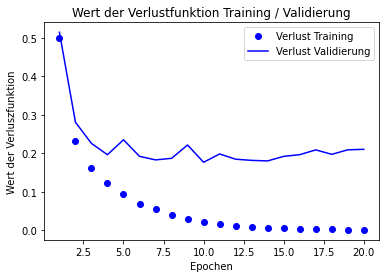

In [17]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', 
        label='Verlust Training') # bo blauer punkt
plt.plot(epochs, val_loss_values, 'b',
        label='Verlust Validierung')
plt.title('Wert der Verlustfunktion Training / Validierung')
plt.xlabel('Epochen')
plt.ylabel('Wert der Verluszfunktion')
plt.legend()
plt.show()

### Korrektklassifizierungsrate

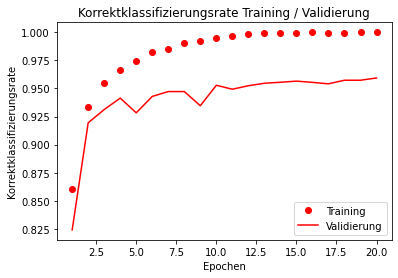

In [18]:
plt.clf() #Zeichenbereich löschen
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'ro', 
        label='Training') # bo blauer punkt
plt.plot(epochs, val_acc, 'r',
        label='Validierung')
plt.title('Korrektklassifizierungsrate Training / Validierung')
plt.xlabel('Epochen')
plt.ylabel('Korrektklassifizierungsrate')
plt.legend()
plt.show()

### Vorhersagen

In [19]:
network.predict(test_images)

array([[1.79516846e-10, 1.16684496e-17, 4.99016869e-11, ...,
        1.00000000e+00, 2.30574647e-13, 3.14898496e-10],
       [1.67880085e-11, 6.76969696e-15, 9.99999881e-01, ...,
        1.29925679e-20, 4.02014290e-11, 1.43635743e-22],
       [8.38073222e-11, 9.99991059e-01, 8.14172381e-07, ...,
        3.52081724e-06, 2.69846441e-06, 1.54160116e-08],
       ...,
       [5.15889948e-15, 2.19026259e-17, 1.25014389e-14, ...,
        2.23129604e-08, 2.05338068e-07, 5.77366905e-07],
       [1.07101814e-10, 2.28497556e-14, 1.19426182e-15, ...,
        3.66831176e-16, 7.26232902e-05, 5.94409352e-15],
       [8.33367087e-15, 5.02658317e-26, 3.17258806e-13, ...,
        1.19184619e-21, 4.16828738e-23, 7.51338652e-21]], dtype=float32)